Regno:21BAI1133 
Name: Mukundh J

#          BCSE209P    -  Lab Assignment 4

Q1. Implement K-NN classification algorithm with Euclidean and Manhattan Distance metrics. The program should be generic, should work for any k values on Iris dataset.
-Keep 80% of samples for training and rest for testing
-Show the results using both distance metrics.
-Compare your results with Scikit/SKlearn Library function.

Q2. Modify your K-NN implementation for regression problem.
-Make an auxiliary dataset from Iris.csv file consisting of only sepal length and sepal width. Assume you want to predict sepal width based on sepal length values.
-Keep 80% of samples for training and rest for testing
-Show the results using Euclidean metric and different K-values. 
-Use appropriate Scikit/SKlearn Library function to apply K-NN regression on the given dataset and compare the results with your implementation.

# Question 1

Import the iris dataset

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
iris = load_iris()
X, y = iris.data, iris.target

Keep 80% of samples for training and rest for testing

In [2]:
import seaborn as sns
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

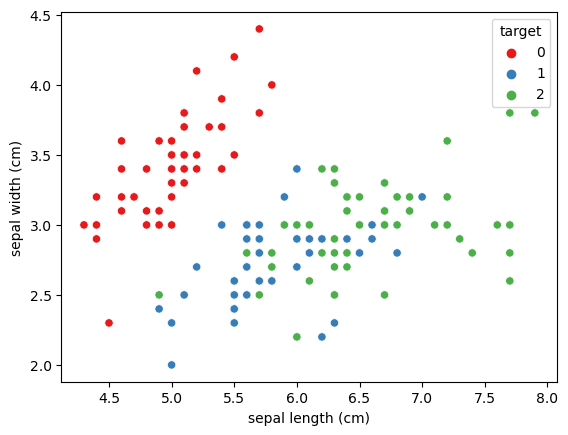

In [3]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="target", palette="Set1")

0==>setosa, 1==>versicolor, 2==>virginica

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

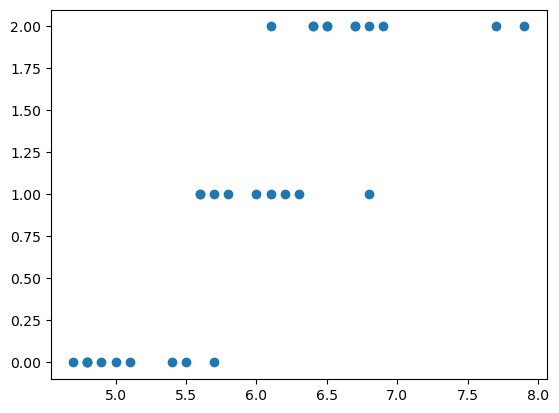

In [5]:
plt.scatter(X_test[:,0],y_test)

Use Euclidean Distance

In [6]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            distances = [euclidean_distance(X[i], x) for x in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[j] for j in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return predictions

In [7]:
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
y_pred1

[1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0]

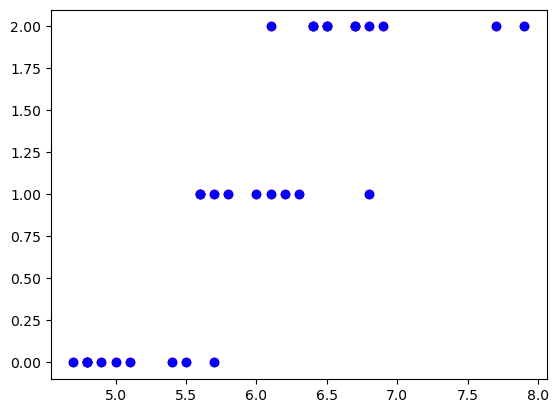

In [8]:
plt.scatter(X_test[:,0],y_pred1,color='red')
plt.scatter(X_test[:,0],y_test,color='blue')

<AxesSubplot:>

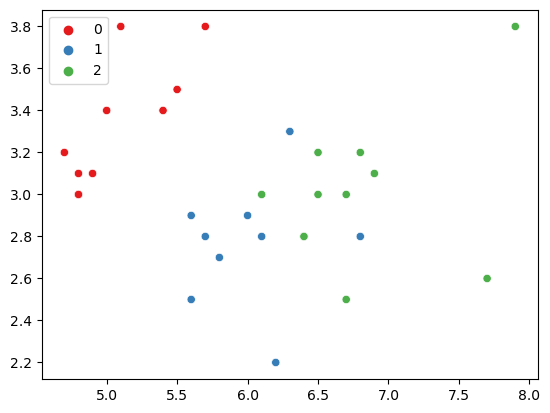

In [9]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred1, palette="Set1")

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


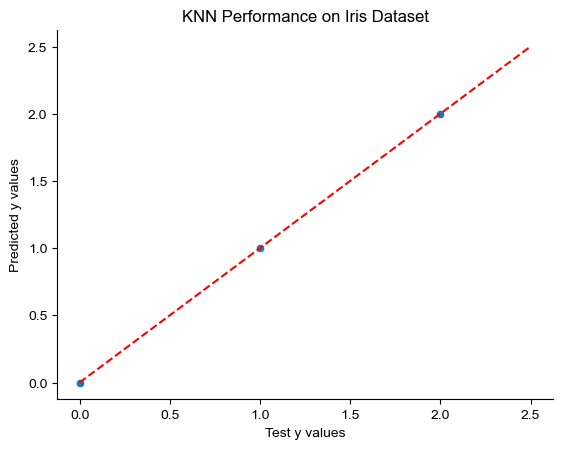

In [10]:
sns.scatterplot(x=y_test, y=y_pred1)
sns.lineplot([0, 2.5], [0, 2.5], color='red', linestyle='--')
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Test y values')
plt.ylabel('Predicted y values')
plt.title('KNN Performance on Iris Dataset')
plt.show()

Use Manhattan Distance

In [11]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

class KNN:
    def __init__(self, k=3, distance_fn=euclidean_distance):
        self.k = k
        self.distance_fn = distance_fn
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            distances = [self.distance_fn(X[i], x) for x in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[j] for j in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return predictions


In [12]:
knn = KNN(k=3, distance_fn=manhattan_distance)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)


In [13]:
y_pred2

[1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0]

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


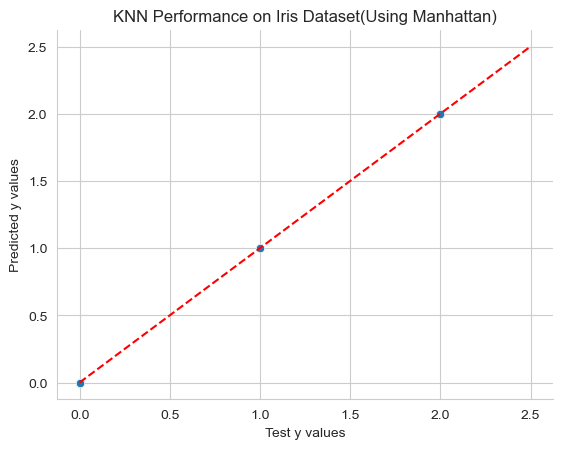

In [14]:
sns.scatterplot(x=y_test, y=y_pred2)
sns.lineplot([0, 2.5], [0, 2.5], color='red', linestyle='--')
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Test y values')
plt.ylabel('Predicted y values')
plt.title('KNN Performance on Iris Dataset(Using Manhattan)')
plt.show()

Using sklearn

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_sk = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_sk.fit(X_train, y_train)
y_pred_sk = knn_sk.predict(X_test)

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
y_pred_sk

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


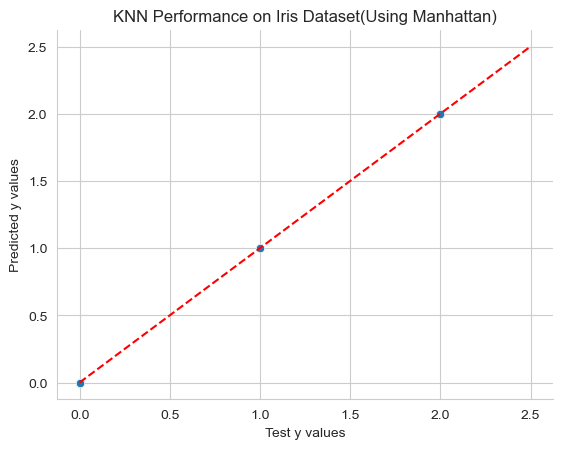

In [17]:
sns.scatterplot(x=y_test, y=y_pred_sk)
sns.lineplot([0, 2.5], [0, 2.5], color='red', linestyle='--')
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Test y values')
plt.ylabel('Predicted y values')
plt.title('KNN Performance on Iris Dataset(Using Manhattan)')
plt.show()

 From the above it can observed that there 100% accuracy since there is no deviation (in all cases)

# Comparison

In [18]:
import pandas as pd
s=pd.DataFrame()

In [19]:
s['ypred_euclidean']=y_pred1
s['ypred_manhattan']=y_pred2
s['y_pred_sk']=y_pred_sk

In [20]:
s

,ypred_euclidean,ypred_manhattan,y_pred_sk
0,1,1,1
1,0,0,0
2,2,2,2
3,1,1,1
4,1,1,1
5,0,0,0
6,1,1,1
7,2,2,2
8,1,1,1
9,1,1,1


To understand further,

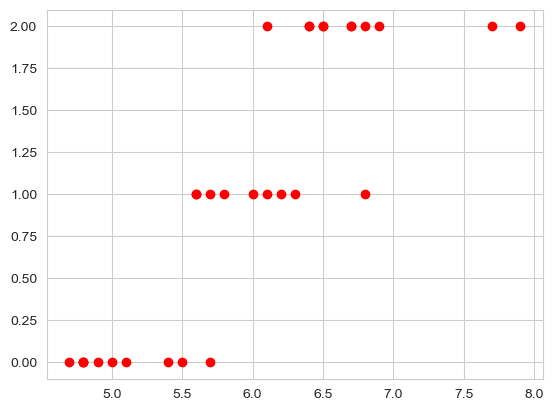

In [21]:
plt.scatter(X_test[:,0],y_pred1,color='red')

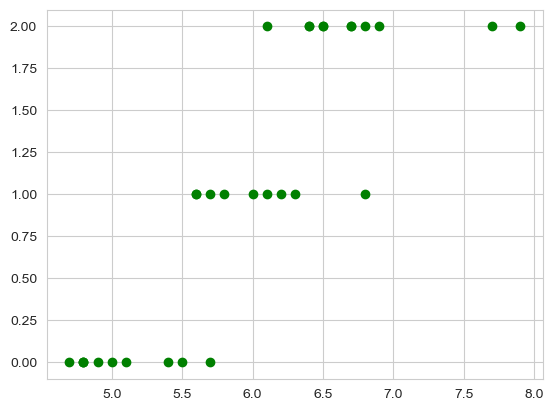

In [22]:
plt.scatter(X_test[:,0],y_pred2,color='green')

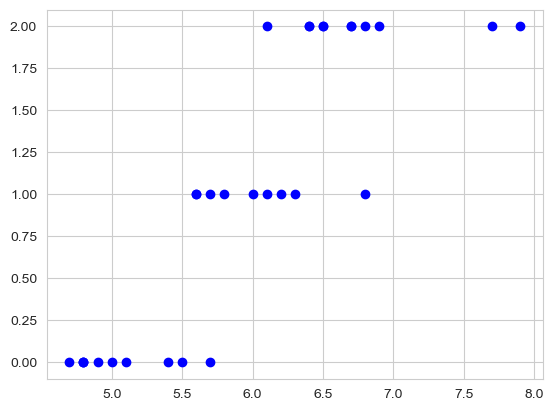

In [23]:
plt.scatter(X_test[:,0],y_pred_sk,color='blue')

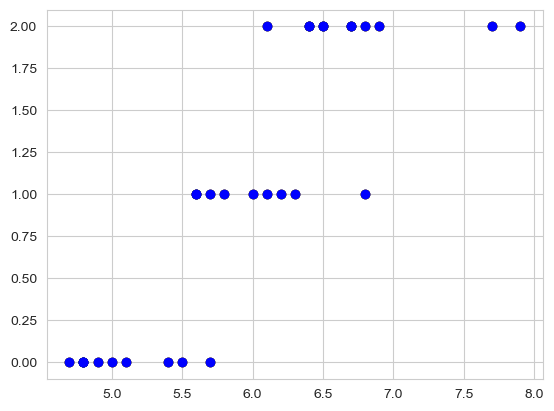

In [24]:
plt.scatter(X_test[:,0],y_pred1,color='red')
plt.scatter(X_test[:,0],y_pred2,color='green')
plt.scatter(X_test[:,0],y_pred_sk,color='blue')

They all merge together, giving the same result.

# Question 2

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
iris = pd.read_csv('Iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
sepal_data = iris[['sepal_length', 'sepal_width']]

X = sepal_data['sepal_length'].values.reshape(-1, 1)
y = sepal_data['sepal_width'].values.reshape(-1, 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNNRegressor:
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        y_pred = np.zeros((X.shape[0], 1))
        
        for i, x in enumerate(X):
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            k_idx = np.argsort(distances)[:self.k]
            k_neighbor_labels = [self.y_train[i] for i in k_idx]  
            y_pred[i] = np.mean(k_neighbor_labels)

        return y_pred

In [30]:
k=int(input())

7


In [31]:
knn = KNNRegressor(k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

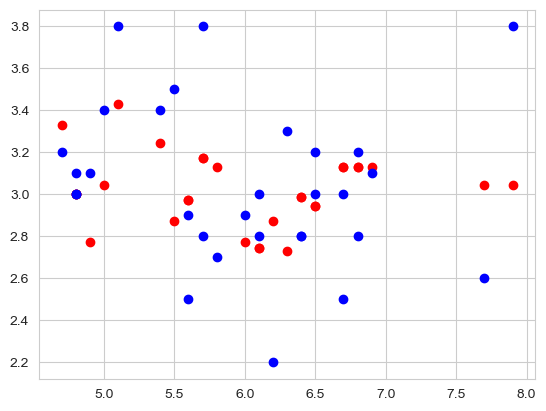

In [32]:
plt.scatter(X_test[:,0],y_pred,color='red')
plt.scatter(X_test[:,0],y_test,color='blue')

In [33]:
mse = ((y_pred - y_test)**2).mean()
print('Mean Squared Error:', mse)

Mean Squared Error: 0.13534693877551027


In [34]:
k=3

Mean Squared Error: 0.19870370370370372


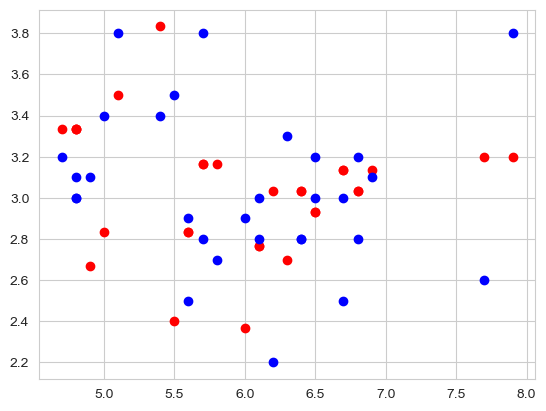

In [35]:
knn = KNNRegressor(k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
plt.scatter(X_test[:,0],y_pred,color='red')
plt.scatter(X_test[:,0],y_test,color='blue')
mse = ((y_pred - y_test)**2).mean()
print('Mean Squared Error:', mse)

In [36]:
k=5

Mean Squared Error: 0.15949333333333335


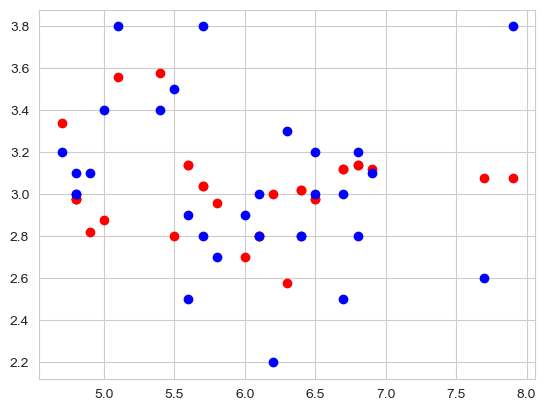

In [37]:
knn = KNNRegressor(k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
plt.scatter(X_test[:,0],y_pred,color='red')
plt.scatter(X_test[:,0],y_test,color='blue')
mse = ((y_pred - y_test)**2).mean()
print('Mean Squared Error:', mse)

Using sklearn

Mean Squared Error (Scikit-Learn): 0.13899999999999996


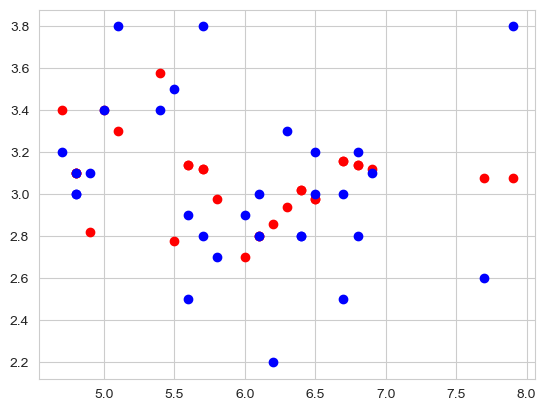

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_sklearn = KNeighborsRegressor(n_neighbors=5)
knn_sklearn.fit(X_train, y_train)

y_pred_sklearn = knn_sklearn.predict(X_test)
plt.scatter(X_test[:,0],y_pred_sklearn,color='red')
plt.scatter(X_test[:,0],y_test,color='blue')
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print('Mean Squared Error (Scikit-Learn):', mse_sklearn)
